In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# variable for path to files
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# read the files into dataframes
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# count rows, find if null data in city data df
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# just to make sure no null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# check data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# determine how many unique city types
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# determine how many of a type there are
sum(city_data_df['type'] == 'Urban')

66

In [10]:
sum(city_data_df['type'] == 'Suburban')

36

In [11]:
sum(city_data_df['type'] == 'Rural')

18

In [12]:
# determine if nulls in ride df
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# city column is only common column, so merge dataframes on that column
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create Dataframes for each type of city
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [19]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [20]:
# get ride count for each df
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [22]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [23]:
# get average fare for each city type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [24]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [25]:
# get average drive count for each city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

### Create Bubble Chart

<IPython.core.display.Javascript object>


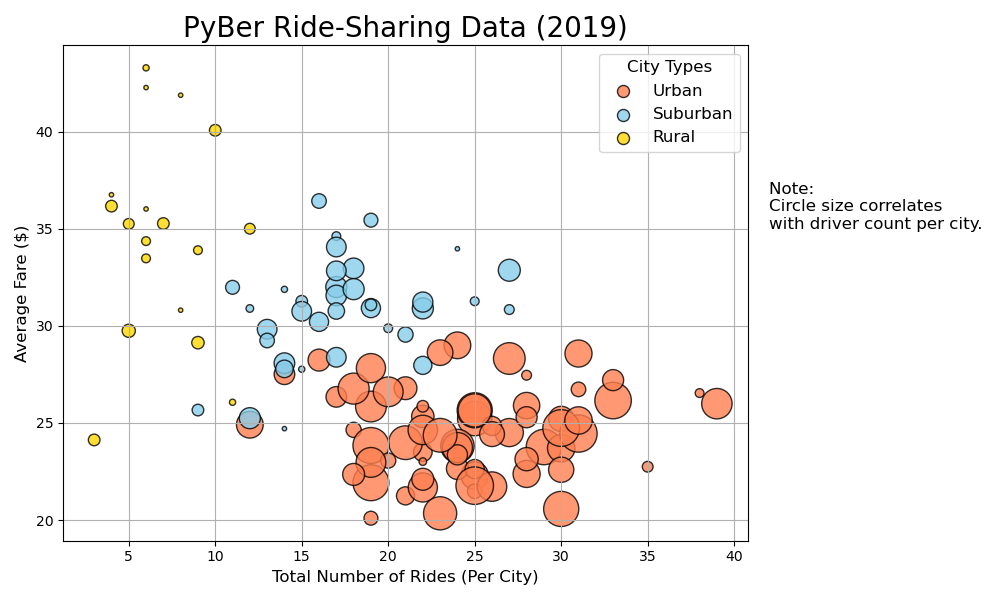

In [26]:
# create scatter plot for each type of city
# x axis is number of rides per city type
# y axis is avg fare
# bubble size is number of drivers
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, alpha=.8, s=10*urban_driver_count, 
            c='coral', linewidths=1, edgecolor='k', label='Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare, alpha=.8, s=10*suburban_driver_count, 
            color='skyblue', linewidths=1, edgecolor='k', label='Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, alpha=.8, s=10*rural_driver_count, 
            color='gold',linewidths=1, edgecolor='k', label='Rural')

plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

In [27]:
# adjust legend settings
lgnd = plt.legend(fontsize=12, mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


In [28]:
# add text note explaining bubble size
plt.text(42, 35, 'Note: \nCircle size correlates \nwith driver count per city.', fontsize=12)

Text(42, 35, 'Note: \nCircle size correlates \nwith driver count per city.')

In [29]:
plt.tight_layout()

In [30]:
# save the figure
plt.savefig('analysis/Fig1')

## Summary Statistics

In [31]:
# Get summary statistics on each city type dataframe
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [32]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [33]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [34]:
# get summary statistics for ride counts
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [35]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [36]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [37]:
# get mean of ride count dataframes using mean() method
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [38]:
# get median using median() method
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [39]:
# get mode counts
round(urban_ride_count.mode(), 2), round(suburban_ride_count.mode(), 2), round(rural_ride_count.mode(), 2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [40]:
# get statistics using Numpy and SciPy
import numpy as np
import scipy.stats as sts

In [41]:
# Calculate measures of central tendency on ride count for urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the urban ride counts is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the urban ride counts is {median_urban_ride_count:.2f}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
#print(f'The mode for the urban ride counts is {mode_urban_ride_count:.2f}.')
mode_urban_ride_count

The mean for the urban ride counts is 24.62.
The median for the urban ride counts is 24.00.


ModeResult(mode=array([22], dtype=int64), count=array([7]))

In [42]:
median_suburban_ride_count = np.median(suburban_ride_count)
median_suburban_ride_count

17.0

In [43]:
mode_rural = sts.mode(rural_ride_count)
mode_rural

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [44]:
suburban_ride_count.value_counts()

17    7
14    4
22    3
19    3
15    3
27    2
18    2
16    2
13    2
12    2
25    1
24    1
21    1
20    1
11    1
9     1
Name: ride_id, dtype: int64

### Summary Statistics on Fares


In [45]:
# get summary statistics on urban fares
urban_fares = urban_cities_df['fare']
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [46]:
# calculate measures of central tendency
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare in urban cities is {mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)
print(f'The median fare in urban cities is {median_urban_fares:.2f}')

mode_urban_fares = sts.mode(urban_fares)
print(mode_urban_fares)

The mean fare in urban cities is 24.53.
The median fare in urban cities is 24.64
ModeResult(mode=array([22.86]), count=array([5]))


In [47]:
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean fare in urban cities is {mean_suburban_fares:.2f}.')

median_suburban_fares = np.median(suburban_fares)
print(f'The median fare in urban cities is {median_suburban_fares:.2f}')

mode_suburban_fares = sts.mode(suburban_fares)
print(mode_suburban_fares)

The mean fare in urban cities is 30.97.
The median fare in urban cities is 30.75
ModeResult(mode=array([17.99]), count=array([3]))


In [48]:
mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare in urban cities is {mean_rural_fares:.2f}.')

median_rural_fares = np.median(rural_fares)
print(f'The median fare in urban cities is {median_rural_fares:.2f}')

mode_rural_fares = sts.mode(rural_fares)
print(mode_rural_fares)

The mean fare in urban cities is 34.62.
The median fare in urban cities is 37.05
ModeResult(mode=array([37.05]), count=array([2]))


In [49]:
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [50]:
# Get measures of central tendency for driver counts for each city type
urban_driver_count = urban_cities_df['driver_count']
mean_urban_driver_count = np.mean(urban_driver_count)
median_urban_driver_count = np.median(urban_driver_count)
mode_urban_driver_count = sts.mode(urban_driver_count)
print(mean_urban_driver_count, median_urban_driver_count, mode_urban_driver_count)

36.67815384615385 37.0 ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [51]:
suburban_driver_count = suburban_cities_df['driver_count']
mean_suburban_driver_count = np.mean(suburban_driver_count)
median_suburban_driver_count = np.median(suburban_driver_count)
mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(mean_suburban_driver_count, median_suburban_driver_count, mode_suburban_driver_count)

13.712 16.0 ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [52]:
rural_driver_count = rural_cities_df['driver_count']
mean_rural_driver_count = np.mean(rural_driver_count)
median_rural_driver_count = np.median(rural_driver_count)
mode_rural_driver_count = sts.mode(rural_driver_count)
print(mean_rural_driver_count, median_rural_driver_count, mode_rural_driver_count)

4.296 4.0 ModeResult(mode=array([1], dtype=int64), count=array([32]))


## Box and Whisker Plots

In [55]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

<IPython.core.display.Javascript object>


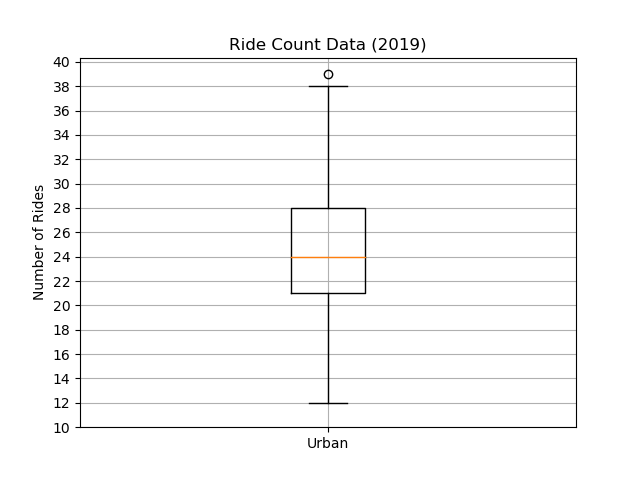

In [62]:
# create box whisker plot for urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add title, y axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


In [63]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

<IPython.core.display.Javascript object>


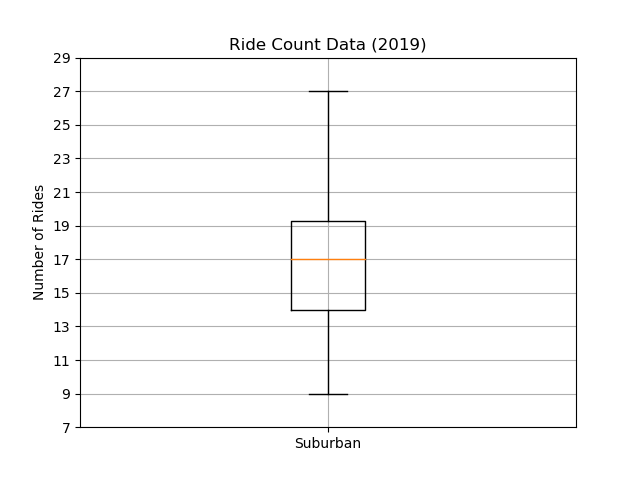

In [71]:
# Create box plot for suburban ride count
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# add title, y axis label, grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange((min(suburban_ride_count)-2), (max(suburban_ride_count)+4), step=2.0))
ax.grid()
plt.show()

<IPython.core.display.Javascript object>


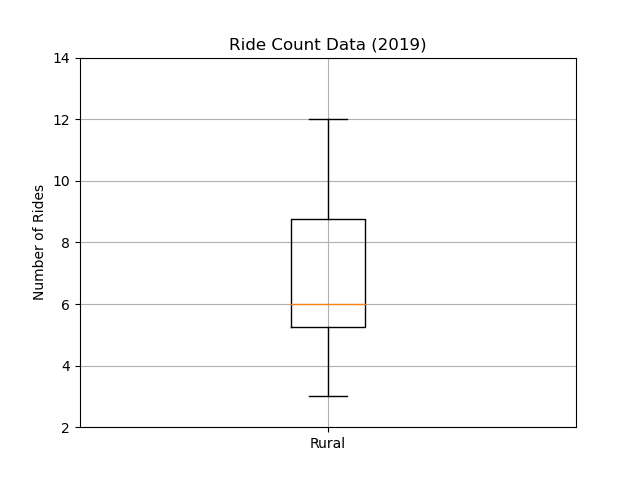

In [70]:
# create box plot for rural ride count
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# add title, y axis label, grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange((min(rural_ride_count)-1), (max(rural_ride_count)+4), step=2.0))
ax.grid()
plt.show()

<IPython.core.display.Javascript object>


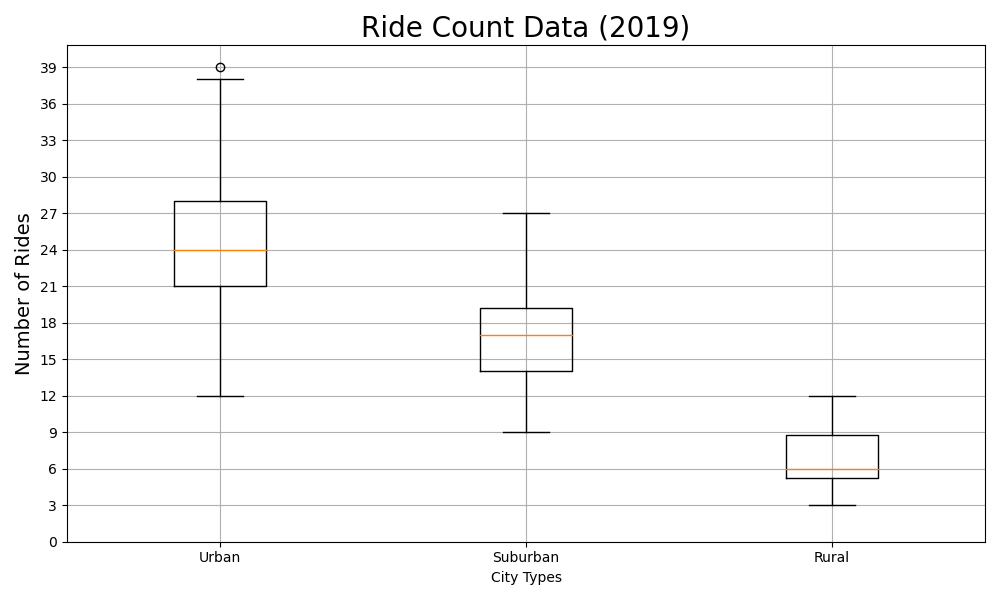

In [77]:
# create single chart for box plots for all 3 city types
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types')
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,41, step=3.0))
ax.grid()

plt.savefig('analysis/fig2.png')
plt.show()

In [78]:
plt.tight_layout()

In [81]:
# Get the city with the highest ride count from the outlier
#filter urban_ride_count for 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.
